In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data
df = pd.read_csv('C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/clustering/wholesale_customers.csv')  # Adjust path if needed
df.columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

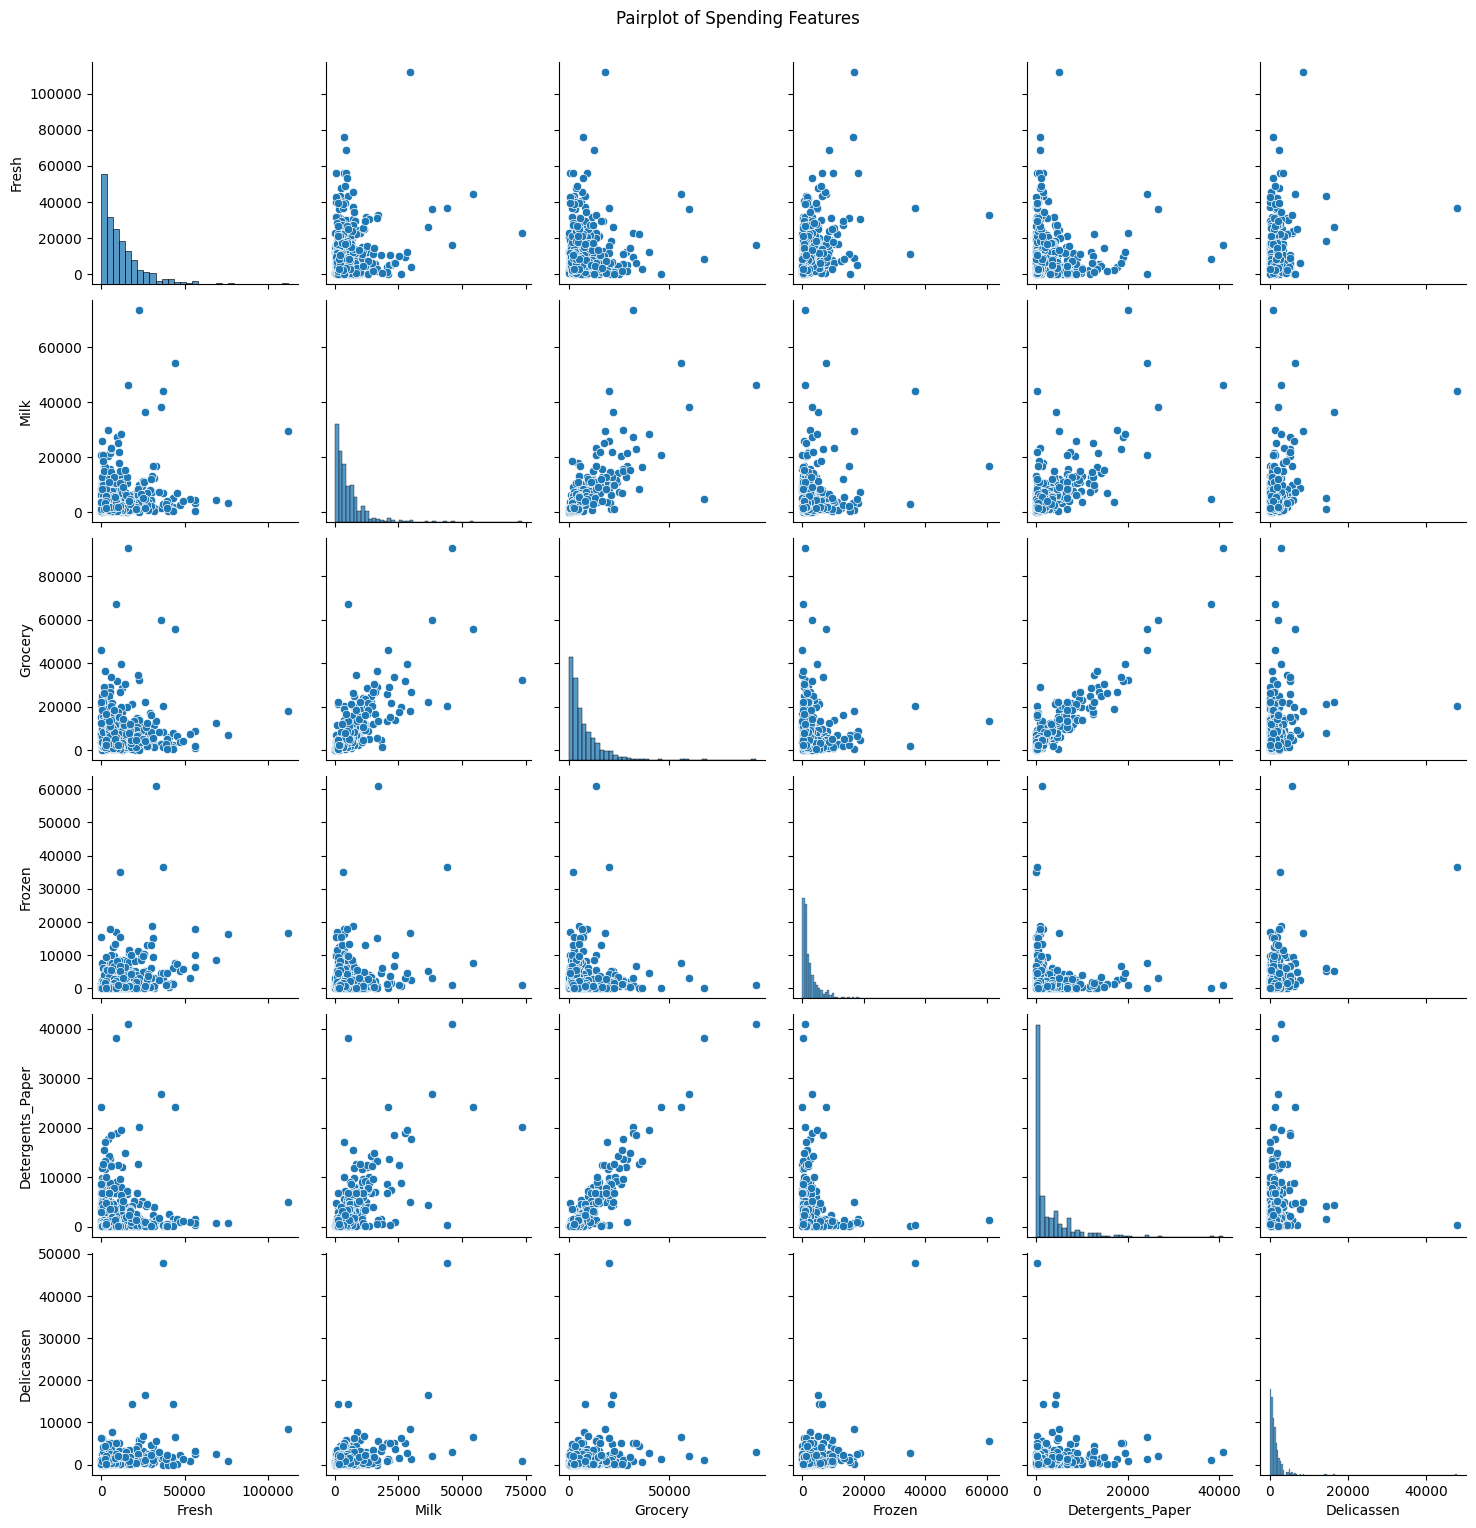

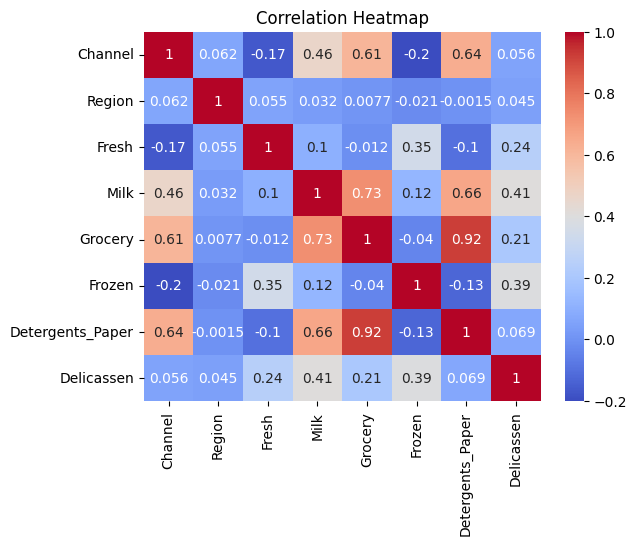

In [2]:
# 3. Exploratory Data Analysis (EDA)
print(df.describe())
sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.suptitle('Pairplot of Spending Features', y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [3]:
# 4. Data Preprocessing: Standardization
X = df.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


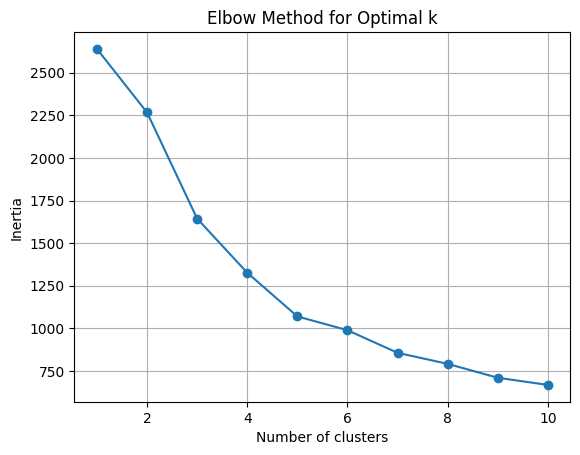

In [4]:
# 5. KMeans Clustering
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Apply KMeans with k=3 (based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = labels_kmeans


In [5]:
# 6. DBSCAN Clustering
dbscan = DBSCAN(eps=1.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels_dbscan


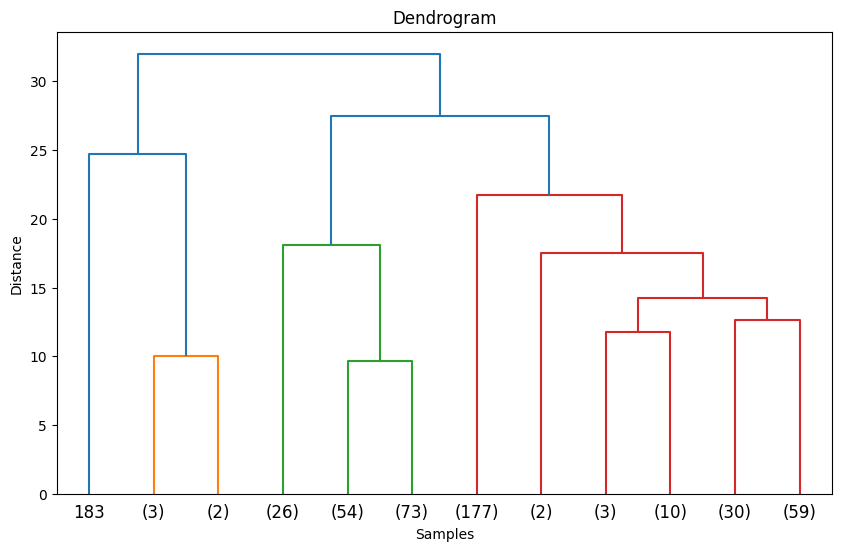

In [6]:
# 7. Hierarchical Clustering (Agglomerative)
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels_hier = agglo.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = labels_hier


In [7]:
# 8. Visualize Clusters using PCA + Plotly
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

fig = px.scatter(df, x='PC1', y='PC2', color=df['KMeans_Cluster'].astype(str),
                 title='KMeans Clustering (PCA Reduced)', labels={'color': 'Cluster'})
fig.show()

fig = px.scatter(df, x='PC1', y='PC2', color=df['Hierarchical_Cluster'].astype(str),
                 title='Hierarchical Clustering (PCA Reduced)', labels={'color': 'Cluster'})
fig.show()

fig = px.scatter(df, x='PC1', y='PC2', color=df['DBSCAN_Cluster'].astype(str),
                 title='DBSCAN Clustering (PCA Reduced)', labels={'color': 'Cluster'})
fig.show()


In [8]:
from sklearn.decomposition import PCA
import plotly.express as px

# PCA with 3 components for 3D visualization
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]
df['PC3'] = components[:, 2]

# 3D scatter plot for KMeans clusters
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                    color=df['KMeans_Cluster'].astype(str),
                    title='KMeans Clustering (3D PCA Reduced)',
                    labels={'color': 'Cluster'})
fig.show()

# 3D scatter plot for Hierarchical clusters
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                    color=df['Hierarchical_Cluster'].astype(str),
                    title='Hierarchical Clustering (3D PCA Reduced)',
                    labels={'color': 'Cluster'})
fig.show()

# 3D scatter plot for DBSCAN clusters
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                    color=df['DBSCAN_Cluster'].astype(str),
                    title='DBSCAN Clustering (3D PCA Reduced)',
                    labels={'color': 'Cluster'})
fig.show()


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming df and X_scaled already prepared from your dataset

# Compute PCA with 3 components (store in df)
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'], df['PC3'] = components[:, 0], components[:, 1], components[:, 2]

# Prepare widgets
methods = ['KMeans', 'Hierarchical', 'DBSCAN']
method_dropdown = widgets.Dropdown(options=methods, value='KMeans', description='Method:')
cluster_slider = widgets.IntSlider(value=4, min=2, max=10, description='Clusters:')
axis_options = ['PC1', 'PC2', 'PC3']
x_dropdown = widgets.Dropdown(options=axis_options, value='PC1', description='X-axis:')
y_dropdown = widgets.Dropdown(options=axis_options, value='PC2', description='Y-axis:')
z_dropdown = widgets.Dropdown(options=axis_options, value='PC3', description='Z-axis:')
output_plot = widgets.Output()

def run_clustering(method, n_clusters):
    if method == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(X_scaled)
    elif method == 'Hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(X_scaled)
    elif method == 'DBSCAN':
        model = DBSCAN(eps=1.3, min_samples=4)
        labels = model.fit_predict(X_scaled)
    else:
        labels = [-1] * len(df)
    return labels

def update_plot(change=None):
    with output_plot:
        clear_output(wait=True)
        method = method_dropdown.value
        n_clusters = cluster_slider.value
        x_axis = x_dropdown.value
        y_axis = y_dropdown.value
        z_axis = z_dropdown.value
        
        # For DBSCAN, ignore cluster slider
        if method == 'DBSCAN':
            cluster_slider.layout.display = 'none'
        else:
            cluster_slider.layout.display = 'block'
        
        labels = run_clustering(method, n_clusters)
        df['Cluster'] = labels.astype(str)
        
        fig = px.scatter_3d(df, x=x_axis, y=y_axis, z=z_axis,
                            color='Cluster',
                            title=f'{method} Clustering on PCA Components',
                            labels={'Cluster': 'Cluster'})
        fig.show()

# Attach widget events
method_dropdown.observe(update_plot, names='value')
cluster_slider.observe(update_plot, names='value')
x_dropdown.observe(update_plot, names='value')
y_dropdown.observe(update_plot, names='value')
z_dropdown.observe(update_plot, names='value')

# Display controls and output
controls = widgets.VBox([
    method_dropdown,
    cluster_slider,
    widgets.HBox([x_dropdown, y_dropdown, z_dropdown])
])

display(controls, output_plot)
update_plot()


Output()